In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

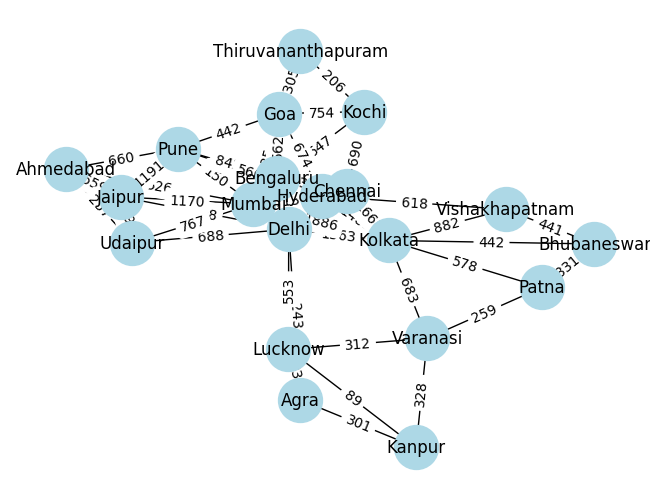

261
315
93
306
Path found: ['Patna', 'Varanasi', 'Lucknow', 'Kanpur', 'Agra']
Number of nodes traced: 4


In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import queue

# Read data from CSV file
file = pd.read_csv("1.csv")

# Create a graph
G = nx.from_pandas_edgelist(file, 'Origin', 'Destination', ['Distance'])
for index, row in file.iterrows():
    G.add_edge(row['Origin'], row['Destination'], weight=row['Distance'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def heuristic(node, goal, pos):
    return euclidean_distance(node, goal, pos)

def A_Algo(G, start, goal, pos):
    visited = set()
    Queue = queue.PriorityQueue()
    Queue.put((0, start, [start]))


    while not Queue.empty():
        _, current_node, path = Queue.get()
        if current_node == goal:
            return path
        if current_node not in visited:
            visited.add(current_node)

            for neighbor in G.neighbors(current_node):
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    weight = G[current_node][neighbor]['weight']  
                    priority = len(new_path) + weight  
                    Queue.put((priority, neighbor, new_path))
        

        print(priority)
   

start = input("Enter Starting City: ")
goal = input("Enter Ending City: ")
path  = A_Algo(G, start, goal, pos)

if path:
    print("Path found:", path)
    print("Number of nodes traced:",len(path)-1)
else:
    print("No path found")


In [ ]:
path = ['Agra','Patna','Delhi','Mumbai']
len(path)